### Heat Conduction (Boundary Value Problem - BVP)

$\frac{∂T}{∂t}=k \nabla^2T$

$\frac{∂}{∂t}T(z,t)=k\frac{∂^2}{∂z^2}T(z,t)$ (1D)

At this point two questions arise:\
    1) How does the temperature change as time progresses?\
    2) How does the temperature change as we move along the rod?
    
Note that the way any one of these values changes depends on the other values.

We approximate the spatial derivative (index i) using the 1st order upwind finite volume method.

This leads to a set of coupled ODEs that is easy to solve.

Then we can use a function like solve_ivp to numerically solve the ODEs and obtain the time-dependent temperature profiles.

**Data**

- Length of wall: L = 1 m

- Initial condition: T$_0$(z) = 150$^o$C

- Left boundary condition: T(0, t) = 100$^o$C

- Right boundary condition: T(L, t) = 200$^o$C

### 1) Upwind finite volume method

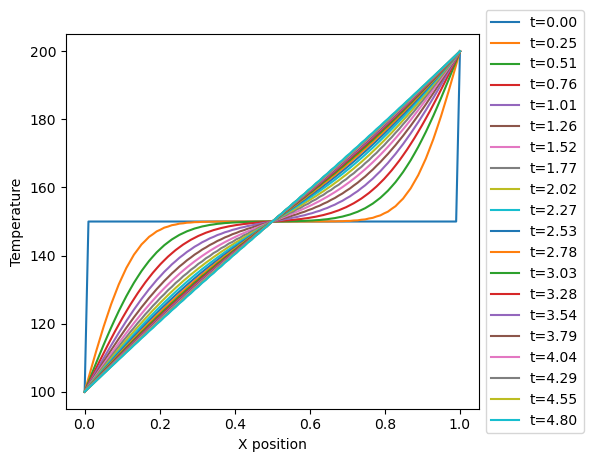

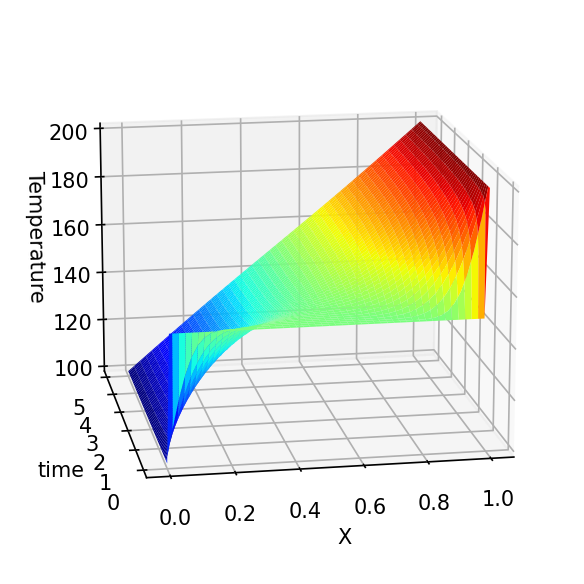

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# number of points for descritization
size = 100 

# temporal descritization
tStart =  0.0
tEnd = 5
t_eval = np.linspace(tStart, tEnd, 100)

# spatial descritization
L_eval = np.linspace(0, 1, size)
h = 0.01 # spatial interval

k = 0.02


"""We apply the 1st-order upwind finite volume method. 
The fluxes are computed at the cell interfaces using the temperature values, 
and the temporal change in the cell averages is calculated to update the solution."""

def odefunc(t, u):
    ut = np.zeros(u.shape)

    # Compute the fluxes at cell interfaces
    fluxes = -k * (u[1:] - u[:-1]) / h

    # Compute the temporal change in the cell averages
    # calculating gradients in the direction of increasing spatial indices (left to right)
    ut[1:-1] = (fluxes[:-1] - fluxes[1:]) / h

    return ut


T_init = 150.0 * np.ones(size) # initial temperature
T_init[0] = 100.0  # one boundary condition
T_init[-1] = 200.0 # the other boundary condition


sol = solve_ivp(odefunc, (tStart, tEnd), T_init, t_eval=t_eval)

for i in range(0, len(t_eval), 5):
    plt.plot(L_eval, sol.y[:, i], label='t={0:1.2f}'.format(t_eval[i]))


# put legend outside the figure
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('X position')
plt.ylabel('Temperature')

# adjust figure edges so the legend is in the figure
plt.subplots_adjust(top=0.89, right=0.77)

# Make a 3d figure
fig = plt.figure(dpi=150)
ax = fig.add_subplot(111, projection='3d')

space, time = np.meshgrid(np.linspace(0, 1, size), t_eval, indexing = 'ij')
ax.plot_surface(space, time, sol.y, cmap='jet')
ax.set_xlabel('X')
ax.set_ylabel('time')
ax.set_zlabel('Temperature')
ax.view_init(elev=15, azim=-100) # adjust view so it is easy to see;

### Apply periodic boundary conditions & central differences method

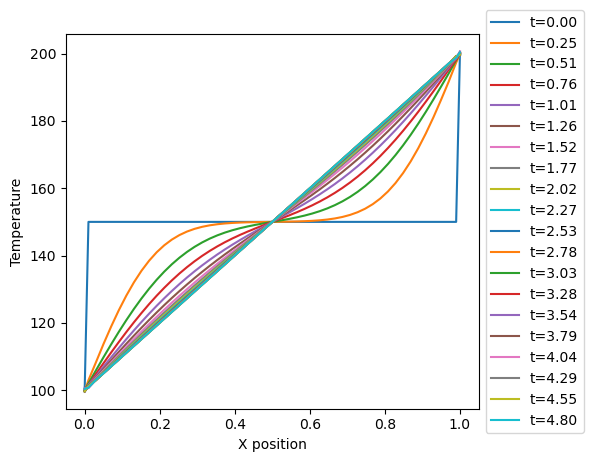

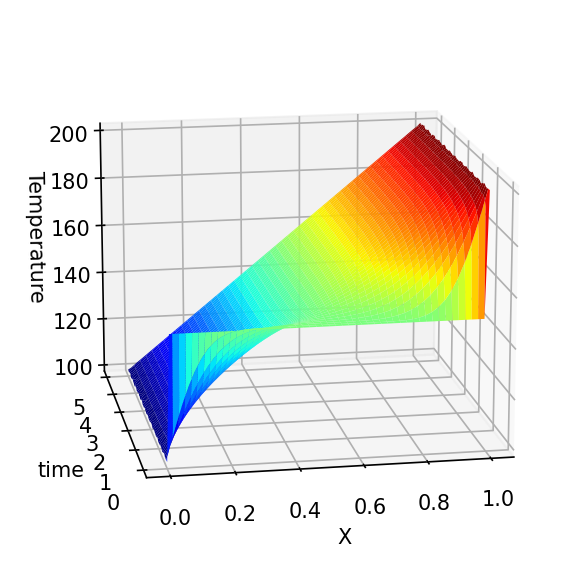

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# number of points for descritization
size = 100

# temporal descritization
tStart =  0.0
tEnd = 5
t_eval = np.linspace(tStart, tEnd, 100)

# spatial descritization
L_eval = np.linspace(0, 1, size)
h = 0.01 # spatial interval

k = 0.02


"""We apply the 1st-order upwind finite volume method. 
The fluxes are computed at the cell interfaces using the temperature values, 
and the temporal change in the cell averages is calculated to update the solution."""

def odefunc(t, u):
    ut = np.zeros(u.shape)
    fluxes = np.zeros(u.shape)
    
    # Backward difference at the left edge
    fluxes[0] = -k * (u[1] - u[0]) / h
    
    # Central difference in the interior
    fluxes[1:-1] = -k * (u[2:] - u[:-2]) / (2 * h)
    
    # Backward difference at the right edge
    fluxes[-1] = -k * (u[-1] - u[-2]) / h

    # Compute the temporal change in the cell averages
    ut[1:-1] = (fluxes[:-2] - fluxes[2:]) / h
    ut[0] = (fluxes[-1] - fluxes[0]) / h  # Apply periodic boundary conditions
    ut[-1] = ut[0]

    return ut

T_init = 150.0 * np.ones(size) # initial temperature
T_init[0] = 100.0  # one boundary condition
T_init[-1] = 200.0 # the other boundary condition


sol = solve_ivp(odefunc, (tStart, tEnd), T_init, t_eval=t_eval)

for i in range(0, len(t_eval), 5):
    plt.plot(L_eval, sol.y[:, i], label='t={0:1.2f}'.format(t_eval[i]))


# put legend outside the figure
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('X position')
plt.ylabel('Temperature')

# adjust figure edges so the legend is in the figure
plt.subplots_adjust(top=0.89, right=0.77)

# Make a 3d figure
fig = plt.figure(dpi=150)
ax = fig.add_subplot(111, projection='3d')

space, time = np.meshgrid(np.linspace(0, 1, size), t_eval, indexing = 'ij')
ax.plot_surface(space, time, sol.y, cmap='jet')
ax.set_xlabel('X')
ax.set_ylabel('time')
ax.set_zlabel('Temperature')
ax.view_init(elev=15, azim=-100) # adjust view so it is easy to see;